In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Source: JHU
covid19 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases.csv')

In [3]:
covid19

,province_state,fips,date,confirmed,deaths
0,Washington,NaN,2020-01-22,1,NaN
1,Washington,NaN,2020-01-23,1,NaN
2,Chicago,NaN,2020-01-24,1,NaN
3,Washington,NaN,2020-01-24,1,NaN
4,Illinois,NaN,2020-01-25,1,NaN
...,...,...,...,...,...
2414808,Wyoming,56039.0,2022-04-08,9932,16.0
2414809,Wyoming,56041.0,2022-04-08,5634,39.0
2414810,Wyoming,56043.0,2022-04-08,2358,43.0
2414811,Wyoming,56045.0,2022-04-08,1588,18.0


In [4]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414813 entries, 0 to 2414812
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   fips            float64
 2   date            object 
 3   confirmed       int64  
 4   deaths          float64
dtypes: float64(2), int64(1), object(2)
memory usage: 92.1+ MB


In [5]:
covid19.dropna(subset=['fips'], inplace=True)  # removing rows aggregated at the state and country level
covid19.date = pd.to_datetime(covid19.date, format='%Y-%m-%d')
covid19.fips = covid19.fips.astype(int).astype('str')
covid19.deaths = covid19.deaths.astype(int)
covid19.columns = ['state', 'county', 'date', 'confirmed', 'deaths']
covid19 = covid19.sort_values(['date', 'state', 'county'])
covid19.reset_index(inplace=True, drop=True)
covid19

,state,county,date,confirmed,deaths
0,Alabama,1001,2020-03-22,0,0
1,Alabama,1003,2020-03-22,2,0
2,Alabama,1005,2020-03-22,0,0
3,Alabama,1007,2020-03-22,0,0
4,Alabama,1009,2020-03-22,0,0
...,...,...,...,...,...
2404700,Wyoming,56039,2022-04-08,9932,16
2404701,Wyoming,56041,2022-04-08,5634,39
2404702,Wyoming,56043,2022-04-08,2358,43
2404703,Wyoming,56045,2022-04-08,1588,18


In [6]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404705 entries, 0 to 2404704
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   state      object        
 1   county     object        
 2   date       datetime64[ns]
 3   confirmed  int64         
 4   deaths     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 91.7+ MB


In [7]:
covid19.head(2)

,state,county,date,confirmed,deaths
0,Alabama,1001,2020-03-22,0,0
1,Alabama,1003,2020-03-22,2,0


In [8]:
covid19.describe()

,confirmed,deaths
count,2.404705e+06,2.404705e+06
mean,9.211388e+03,1.495796e+02
std,4.086825e+04,6.698730e+02
min,0.000000e+00,0.000000e+00
25%,3.180000e+02,4.000000e+00
50%,1.591000e+03,2.800000e+01
75%,5.372000e+03,9.100000e+01
max,2.843599e+06,3.177000e+04


In [9]:
covid19.date.min()

Timestamp('2020-03-22 00:00:00')

In [10]:
covid19.date.max()

Timestamp('2022-04-08 00:00:00')

In [11]:
# confirmed column is a cumulative sum - so the total sum gives us the incorrect total
covid19.confirmed.sum()

22150670547

In [12]:
covid_last_day = covid19[covid19.date == covid19.date.max()]
covid_last_day = covid_last_day.drop('date', axis=1)
covid_last_day.reset_index(inplace=True, drop=True)
covid_last_day.head(2)

,state,county,confirmed,deaths
0,Alabama,1001,15744,213
1,Alabama,1003,55489,677


In [13]:
# This should give us the total
covid_last_day.confirmed.sum()

79996324

In [14]:
bar_data = covid_last_day.groupby('state')[['confirmed']].sum().sort_values('confirmed', ascending=False).reset_index()
bar_data

,state,confirmed
0,California,9132927
1,Texas,6781253
2,Florida,5906352
3,New York,5028707
4,Illinois,3080436
5,Pennsylvania,2787687
6,Ohio,2676629
7,North Carolina,2634007
8,Georgia,2503082
9,Michigan,2354667


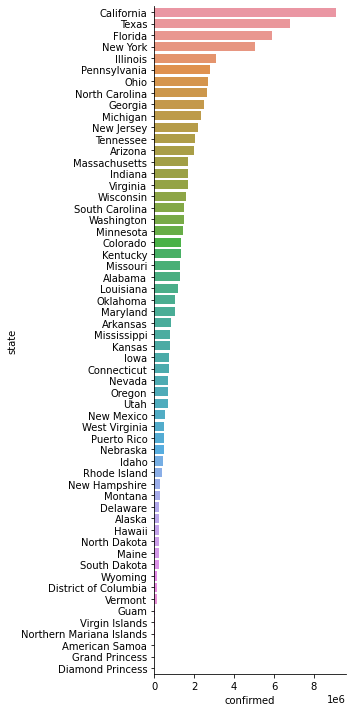

In [15]:
sns.catplot(data=bar_data, x='confirmed', y='state', kind='bar', 
            height=10, aspect=0.5);

In [16]:
covid19.date.max()

Timestamp('2022-04-08 00:00:00')

In [17]:
from datetime import timedelta
covid19.date.max() - timedelta(days=13)

Timestamp('2022-03-26 00:00:00')

In [18]:
from datetime import timedelta
date_13 = covid19.date.max() - timedelta(days=13)
covid_13 = covid19[covid19.date == date_13]
covid_13 = covid_13.drop('date', axis=1)
covid_13.reset_index(inplace=True, drop=True)
covid_13.head(2)

,state,county,confirmed,deaths
0,Alabama,1001,15611,209
1,Alabama,1003,55373,674


In [19]:
merged_df = pd.merge(covid_last_day, covid_13, on=['state', 'county'], how='left', suffixes=('_0', '_13'))
merged_df.head(5)

,state,county,confirmed_0,deaths_0,confirmed_13,deaths_13
0,Alabama,1001,15744,213,15611,209
1,Alabama,1003,55489,677,55373,674
2,Alabama,1005,5658,98,5478,97
3,Alabama,1007,6422,101,6415,101
4,Alabama,1009,14929,239,14896,233


In [20]:
merged_df['confirmed'] = merged_df.confirmed_0 - merged_df.confirmed_13
merged_df['deaths'] = merged_df.deaths_0 - merged_df.deaths_13
merged_df.head(5)

,state,county,confirmed_0,deaths_0,confirmed_13,deaths_13,confirmed,deaths
0,Alabama,1001,15744,213,15611,209,133,4
1,Alabama,1003,55489,677,55373,674,116,3
2,Alabama,1005,5658,98,5478,97,180,1
3,Alabama,1007,6422,101,6415,101,7,0
4,Alabama,1009,14929,239,14896,233,33,6


As of April 8, 2022 it appearas that some counties have bad values for confirmed cases, resulting in negative values for total of last 14 days. Here are some examples:

In [21]:
merged_df[merged_df.confirmed < 0].sort_values('confirmed')

,state,county,confirmed_0,deaths_0,confirmed_13,deaths_13,confirmed,deaths
2887,Texas,48451,30622,462,40908,460,-10286,2
3039,Virginia,51540,9180,79,10148,77,-968,2
1815,New Hampshire,90033,6638,2,7547,27,-909,-25
2661,Tennessee,90047,37477,459,38234,319,-757,140
1786,Nebraska,90031,3638,766,3977,1823,-339,-1057
...,...,...,...,...,...,...,...,...
2540,South Dakota,46087,1340,31,1341,31,-1,0
1007,Kansas,20187,427,8,428,8,-1,0
2657,Tennessee,47185,8223,128,8224,127,-1,1
1781,Nebraska,31177,4542,42,4543,25,-1,17


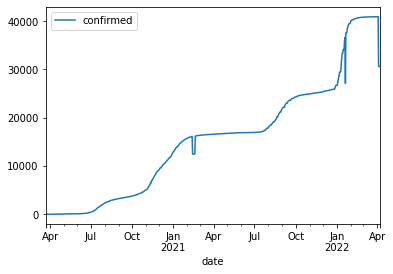

In [22]:
covid19[covid19.county=='48451'][['date', 'confirmed']].set_index('date').plot();

This needs to be investigated. As a quick workaround we will replace the value for new confirmed case for these 106 counties with 0 for the rest of our calculations:

In [23]:
merged_df.loc[merged_df.confirmed < 0, 'confirmed'] = 0

In [24]:
merged_df.loc[merged_df.confirmed < 0]

,state,county,confirmed_0,deaths_0,confirmed_13,deaths_13,confirmed,deaths


In [25]:
covid_last_14_days = merged_df[['state', 'county', 'confirmed', 'deaths']]
covid_last_14_days.head(2)

,state,county,confirmed,deaths
0,Alabama,1001,133,4
1,Alabama,1003,116,3


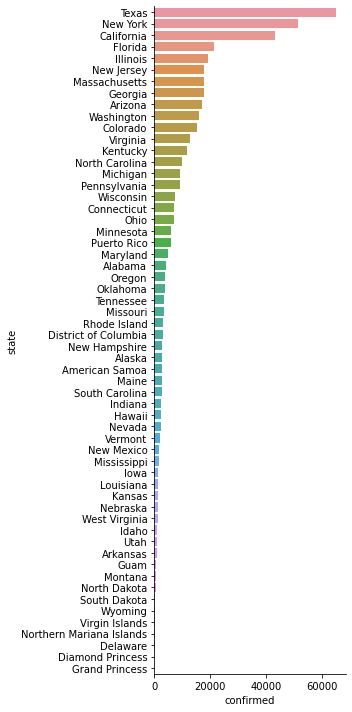

In [26]:
covid_last_14_days_state = covid_last_14_days.groupby('state')[['confirmed', 'deaths']].sum().sort_values('confirmed', ascending=False).reset_index()
sns.catplot(data=covid_last_14_days_state, x='confirmed', y='state', kind='bar', 
            height=10, aspect=0.5);

In [27]:
us_pop = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US_Population_By_State_2019.csv')
us_pop.head()

,STATE,POPULATION
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [28]:
df_14 = covid_last_14_days_state.merge(us_pop, how='right', left_on='state', right_on='STATE')
df_14.drop('STATE', axis=1, inplace=True)
df_14.head(2)

,state,confirmed,deaths,POPULATION
0,Alabama,4235,166,4903185
1,Alaska,2843,6,731545


In [29]:
df_14['confirmed_per_m'] = np.round(df_14['confirmed'] / df_14['POPULATION'] * 1000000, 2)
df_14['deaths_per_m'] = np.round(df_14['deaths'] / df_14['POPULATION'] * 1000000, 2)
df_14.sort_values('confirmed_per_m', ascending=False, inplace=True)
df_14.head(2)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m
8,District of Columbia,2980,14,705749,4222.46,19.84
1,Alaska,2843,6,731545,3886.30,8.20


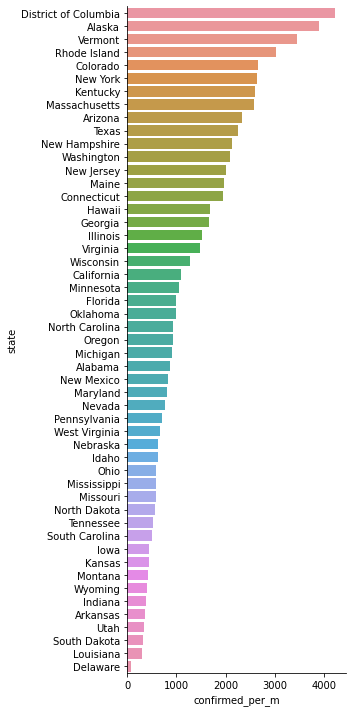

In [30]:
sns.catplot(data=df_14, x='confirmed_per_m', y='state', kind='bar', 
            height=10, aspect=0.5);

In [31]:
df_14.sort_values('confirmed_per_m', ascending=False)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m
8,District of Columbia,2980,14,705749,4222.46,19.84
1,Alaska,2843,6,731545,3886.30,8.20
45,Vermont,2152,5,623989,3448.78,8.01
39,Rhode Island,3200,87,1059361,3020.69,82.12
5,Colorado,15256,33,5758736,2649.19,5.73
32,New York,51451,124,19453561,2644.81,6.37
17,Kentucky,11615,475,4467673,2599.79,106.32
21,Massachusetts,17682,71,6892503,2565.40,10.30
2,Arizona,16983,798,7278717,2333.24,109.63
43,Texas,65088,653,28995881,2244.73,22.52


In [32]:
# As of Feb 11, 2022
us_vax = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/us_state_vaccinations.csv')
us_vax.head(5)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [33]:
us_vax.date.max()

'2022-02-11'

In [34]:
us_vax = us_vax[us_vax.date == us_vax.date.max()]
us_vax = us_vax[['location', 'people_fully_vaccinated_per_hundred']]
us_vax.columns = ['state', 'vax_rate']
us_vax.head(2)

,state,vax_rate
395,Alabama,49.82
791,Alaska,59.94


In [35]:
df_14 = df_14.merge(us_vax)
df_14.head()

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate
0,District of Columbia,2980,14,705749,4222.46,19.84,70.66
1,Alaska,2843,6,731545,3886.30,8.20,59.94
2,Vermont,2152,5,623989,3448.78,8.01,79.76
3,Rhode Island,3200,87,1059361,3020.69,82.12,79.77
4,Colorado,15256,33,5758736,2649.19,5.73,68.71


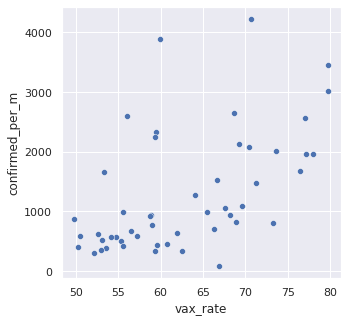

In [36]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data=df_14, x='vax_rate', y='confirmed_per_m');

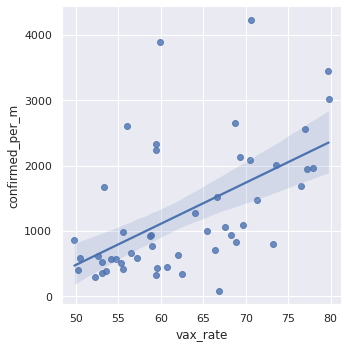

In [37]:
sns.lmplot(x='vax_rate', y='confirmed_per_m', data=df_14);

In [38]:
# Correlation
df_14['confirmed_per_m'].corr(df_14['vax_rate'])

0.5461399743910244

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


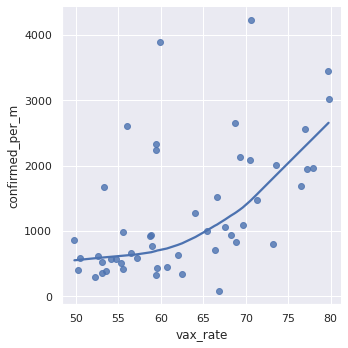

In [39]:
sns.lmplot(x='vax_rate', y='confirmed_per_m', data=df_14,
           lowess=True);

In [40]:
# Install and import the package
!pip install plotly_express -q
import plotly_express as px

In [41]:
fig = px.scatter(df_14, x="confirmed_per_m", y="vax_rate", color="state")
fig.show()

In [42]:
abbrevs = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/state-abbrevs.csv')
abbrevs.head(1)

,state,abbreviation
0,Alabama,AL


In [43]:
df_14 = df_14.merge(abbrevs)
df_14.head(1)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate,abbreviation
0,District of Columbia,2980,14,705749,4222.46,19.84,70.66,DC


In [44]:
import plotly.express as px

px.scatter_geo(df_14, 
               locations='abbreviation', 
               locationmode='USA-states',
               color='confirmed_per_m', 
               size='vax_rate',
               hover_name='state',
               hover_data=['confirmed', 'confirmed_per_m', 'deaths', 'deaths_per_m'],
               scope='usa'
               )

Replicating the [CDC chart](https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days).

In [45]:
import plotly.express as px

px.choropleth(df_14, 
              locations='abbreviation', 
              locationmode='USA-states',
              color='confirmed_per_m', 
              hover_name='state', 
              hover_data=['confirmed', 'confirmed_per_m', 'deaths', 'deaths_per_m'],
              scope='usa'
              )

# COVID-19 Mortality

During the visualization came across issues with Nebraska's `deaths`. Below we can see some abnormalities for the cumulative `deaths` which should not go down. This needs to be investigated.

At the state level this columns seems OK.

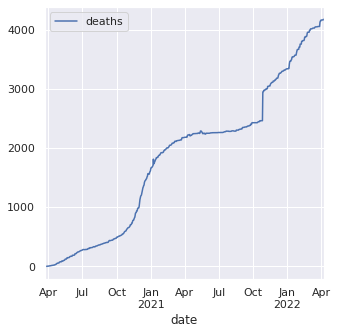

In [46]:
aa = covid19[covid19.state=='Nebraska'][['date','county','deaths']]
aa = aa.groupby('date').agg({'deaths':'sum'})
aa.plot();

In [47]:
merged_df[merged_df.state=='Nebraska'].sort_values('deaths_13', ascending=False)

,state,county,confirmed_0,deaths_0,confirmed_13,deaths_13,confirmed,deaths
1786,Nebraska,90031,3638,766,3977,1823,0,-1057
1720,Nebraska,31055,149567,1030,149210,718,357,312
1747,Nebraska,31109,78215,289,77944,170,271,119
1769,Nebraska,31153,49742,247,49635,131,107,116
1732,Nebraska,31079,16522,140,16491,117,31,23
...,...,...,...,...,...,...,...,...
1744,Nebraska,31103,119,0,118,0,1,0
1735,Nebraska,31085,106,0,105,0,1,0
1734,Nebraska,31083,378,3,377,0,1,3
1784,Nebraska,31183,127,2,127,0,0,2


We can see one potential issue is for county "90031"

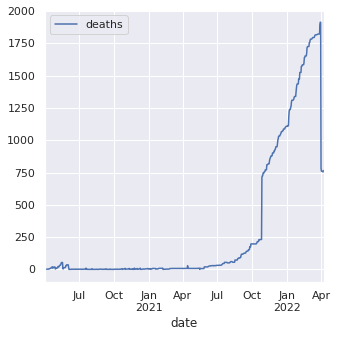

In [48]:
covid19[(covid19.state=='Nebraska') & (covid19.county=='90031')][['date','deaths']].set_index('date').plot();

In [49]:
df_14.sort_values('deaths_per_m', ascending=False)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate,abbreviation
7,Arizona,16983,798,7278717,2333.24,109.63,59.43,AZ
5,Kentucky,11615,475,4467673,2599.79,106.32,56.01,KY
41,Kansas,1277,281,2913314,438.33,96.45,59.57,KS
3,Rhode Island,3200,87,1059361,3020.69,82.12,79.77,RI
27,New Mexico,1735,154,2096829,827.44,73.44,68.91,NM
22,Oklahoma,3902,257,3956971,986.11,64.95,55.53,OK
32,Nebraska,1217,122,1934408,629.13,63.07,61.98,NE
24,Oregon,3937,261,4217737,933.44,61.88,68.22,OR
38,Tennessee,3561,363,6829174,521.44,53.15,53.07,TN
15,Georgia,17682,561,10617423,1665.38,52.84,53.26,GA


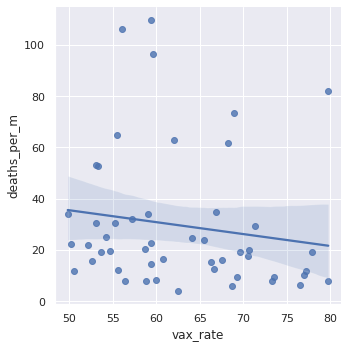

In [50]:
sns.lmplot(x="vax_rate", y="deaths_per_m", data=df_14);

In [51]:
# Correlation
df_14['deaths_per_m'].corr(df_14['vax_rate'])

-0.15167711371076983